In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA

import dill
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap

from utils.sobi import sobi
from utils.generate_and_plot_signals import generate_signals, plot_source_signals, plot_signals, find_value_index

In [41]:
plt.rcParams['font.family']=['Arial', 'serif', 'Times New Roman']
plt.style.use('default')
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format = 'svg'

# Non-stationary time series

## Generate or load data

In [46]:
# generate 50 random trials

n_trials = 50
n_ch = 6
n_times = 1001

raw_data = np.empty((n_trials, n_ch, n_times))
Atrue = np.random.random([n_ch, n_ch])

for t in range(n_trials):
    Strue = generate_signals(stationary=False)
    raw_data[t] = Atrue.dot(Strue)

X = raw_data[0]

# with open('./saves/generate_data.pkl', 'wb') as f:
#     dill.dump([Strue, Atrue, raw_data], f)

In [47]:
with open('./saves/generate_data.pkl', 'rb') as f:
    [Strue, Atrue, raw_data] = dill.load(f)

X = raw_data[0]

## Plot

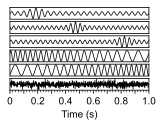

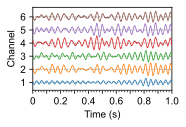

In [48]:
plot_signals(Strue, figsize=(2.5, 1.5));

plot_source_signals(X, figsize=(2.5, 1.5));

## Ground true of microstates

In [51]:
# font = {'family':['Arial', 'Times New Roman'], 'color':'k', 'weight':'normal', 'size':10 }
# fill_color = sns.color_palette('Set2')
# colors = [fill_color[0],fill_color[1],fill_color[2],fill_color[5],fill_color[4]]
# alpha = 0.3

In [52]:
font = {'family':['Arial', 'Times New Roman'], 'color':'k', 'weight':'normal', 'size':10 }

colors = sns.color_palette('Set3') # Set3 pastel2 tab20 
tab = sns.color_palette('tab20')
colors.remove(colors[1])
colors.extend( [tab[1], tab[3], tab[5], tab[7], tab[9], tab[11], tab[13], tab[15] ] )
alpha = 0.4

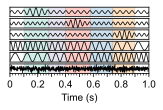

In [53]:
num_signals = X.shape[0]
fig, axlist = plt.subplots(num_signals, 1, sharex=True, sharey=False, figsize=(2.5, 1.2))
for i, ax in enumerate(axlist):
    
    interval = find_value_index(np.arange(0,1001,1), 100, 280)
    ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[0], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
    interval = find_value_index(np.arange(0,1001,1), 400, 580)
    ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[2], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
    interval = find_value_index(np.arange(0,1001,1), 740, 900)
    ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[4], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)

    interval = find_value_index(np.arange(0,1001,1), 280, 400)
    ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[1], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
    interval = find_value_index(np.arange(0,1001,1), 580, 740)
    ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[3], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)

    ax.plot(Strue[i], linewidth=0.75, color='k', zorder=25)
    ax.yaxis.set_visible(False)
    
    if i == 5:
        ax.xaxis.set_minor_locator(MultipleLocator(20))
        ax.set_xticks(np.arange(0,1001,100), 
            ['0','','0.2','','0.4','','0.6','','0.8','','1.0'], fontdict=font);
        ax.set_xlim((0,1000))
    else:
        ax.tick_params(which='both', bottom=False, top=False, left=False, right=False,
                        labelbottom=False, labelleft=False, direction='out',width=0.4)

plt.xlabel('Time (s)', fontdict=font);

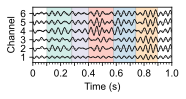

In [54]:
plt.figure(figsize=(2.5,1.0))

ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(20))

interval = find_value_index(np.arange(0,1001,1), 100, 280)
ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[0], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
interval = find_value_index(np.arange(0,1001,1), 400, 580)
ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[2], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
interval = find_value_index(np.arange(0,1001,1), 740, 900)
ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[4], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)

interval = find_value_index(np.arange(0,1001,1), 280, 400)
ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[1], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)
interval = find_value_index(np.arange(0,1001,1), 580, 740)
ax.fill_between(np.arange(0,1001,1), 0, 1, where=interval, color=colors[3], alpha=alpha, transform=ax.get_xaxis_transform(), edgecolor='gray', linewidth=0.5)


for i in range(X.shape[0]):
    X_shift = X[i]
    X_shift += i * 5
    
    plt.plot(X_shift, linewidth=0.75, color='k', zorder=10)
    plt.axhline(y=i*5, ls=":",c="gray", linewidth=1)

plt.xlim((0,1000))

plt.xticks(np.arange(0,1001,100), 
        ['0','','0.2','','0.4','','0.6','','0.8','','1.0'], fontdict=font);
plt.yticks(np.arange(0,26,5), 
        ['1','2','3','4','5','6'], fontdict=font);

plt.xlabel('Time (s)', fontdict=font);
plt.ylabel('Channel', fontdict=font);
